# Data Prep with Time Series

## Exercises
The end result of this exercise should be a file named prepare.py.

## Imports

In [1]:
# standart imports
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Using your store items data:

    1. Convert date column to datetime format.

In [2]:
#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [23]:
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,2013-01-01,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,2013-01-02,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,2013-01-03,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,2013-01-04,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,2013-01-05,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [6]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [9]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')

In [10]:
df.sale_date[0]

Timestamp('2013-01-01 00:00:00')

In [11]:
df.sale_date.astype('datetime64')

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

In [12]:
df.sale_date.dtype

dtype('<M8[ns]')

In [13]:
df.sale_date.info()

<class 'pandas.core.series.Series'>
Int64Index: 913000 entries, 0 to 912999
Series name: sale_date
Non-Null Count   Dtype         
--------------   -----         
913000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 46.2 MB


    2. Plot the distribution of sale_amount and item_price.

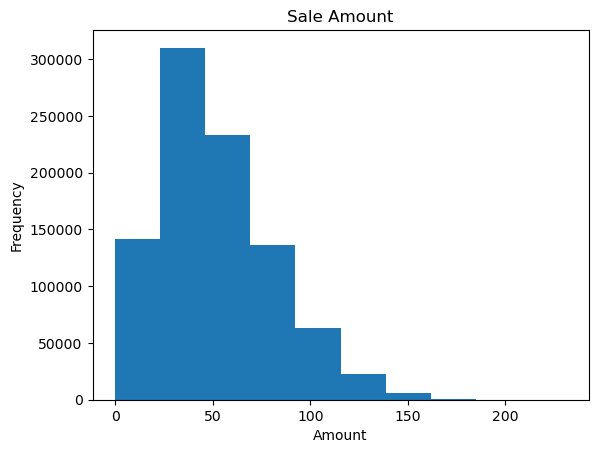

In [50]:
plt.hist(df['sale_amount'])
plt.title('Sale Amount')
plt.ylabel('Frequency')
plt.xlabel('Amount')
plt.show()

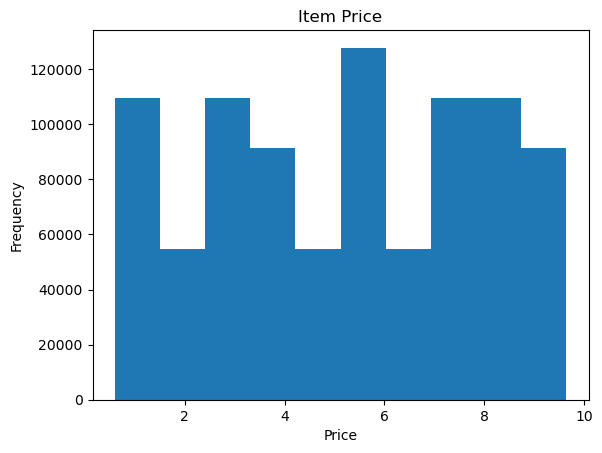

In [49]:
plt.hist(df['item_price'])
plt.title('Item Price')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.show()

    3. Set the index to be the datetime variable.

In [24]:
df = df.set_index('sale_date')

In [26]:
df = df.sort_index()

In [27]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


    4. Add a 'month' and 'day of week' column to your dataframe.

In [28]:
#use dayofweek attribute and save
df['dayofweek'] = df.index.day_name()

In [30]:
#pull out weekday name & save
df['month'] = df.index.month_name()

In [31]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,dayofweek,month
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,January
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,January
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January


In [36]:
cols = list(df.columns.values)
cols

['item',
 'sale_amount',
 'sale_id',
 'store',
 'item_brand',
 'item_id',
 'item_name',
 'item_price',
 'item_upc12',
 'item_upc14',
 'store_address',
 'store_city',
 'store_id',
 'store_state',
 'store_zipcode',
 'dayofweek',
 'month']

In [37]:
df = df[['dayofweek',
 'month','item',
 'sale_amount',
 'sale_id',
 'store',
 'item_brand',
 'item_id',
 'item_name',
 'item_price',
 'item_upc12',
 'item_upc14',
 'store_address',
 'store_city',
 'store_id',
 'store_state',
 'store_zipcode'
 ]]

In [39]:
df.head()

,dayofweek,month,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,January,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,1,January,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,1,January,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,1,January,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,1,January,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


    5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [40]:
# add a column named sales_total which is a derived from sale_amount (total items) and item_price
df['sales_total'] = df.sale_amount * df.item_price

In [42]:
cols = list(df.columns.values)
cols

['dayofweek',
 'month',
 'item',
 'sale_amount',
 'sale_id',
 'store',
 'item_brand',
 'item_id',
 'item_name',
 'item_price',
 'item_upc12',
 'item_upc14',
 'store_address',
 'store_city',
 'store_id',
 'store_state',
 'store_zipcode',
 'sales_total']

In [47]:
df = df[['dayofweek',
 'month',
 'sale_amount',
 'item_price',
 'sales_total',
 'sale_id',
 'item',
 'item_id',
 'item_name',
 'item_brand',
 'item_upc12',
 'item_upc14',
 'store_id',
 'store',
 'store_address',
 'store_city',
 'store_state',
 'store_zipcode'
 ]]

In [48]:
df.head()

,dayofweek,month,sale_amount,item_price,sales_total,sale_id,item,item_id,item_name,item_brand,item_upc12,item_upc14,store_id,store,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,January,13.0,0.84,10.92,1,1,1,Riceland American Jazmine Rice,Riceland,35200264013,35200264013,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,1,January,26.0,1.16,30.16,295813,17,17,Ducal Refried Red Beans,Ducal,88313590791,88313590791,3,3,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,1,January,32.0,9.64,308.48,125995,7,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,Twinings Of London,70177154004,70177154004,10,10,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,1,January,45.0,4.39,197.55,314073,18,18,Scotch Removable Clear Mounting Squares - 35 Ct,Scotch,21200725340,21200725340,3,3,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,1,January,34.0,0.74,25.16,332333,19,19,Careone Family Comb Set - 8 Ct,Careone,41520035646,41520035646,3,3,2118 Fredericksburg Rdj,San Antonio,TX,78201


    6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [56]:
#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [57]:
def prep_superstore_data(df):
    '''
    This function will clean the data by 
    converting the sale_date from object to datetime64
    and setting it as index. Also, will add three columns
    (dayofweek, month and sales_total). It also rearrange the
    columns for better reading. Finally, it will display two
    plot distributions for sale_amount and item_price. 
    '''
    
    # replace the hours, minutes, seconds and GMT with nothing
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    
    # convert the date from object to datetime
    df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')
    
    # This is another way to do it
    # change the date from object to datetime
    # df.sale_date = df.sale_date.astype('datetime64')
    
    # set sale_date as the index
    df = df.set_index('sale_date')
    
    # sort the index (sale_date)
    df = df.sort_index()
    
    # use dayofweek attribute and save
    df['dayofweek'] = df.index.day_name()

    # pull out weekday name & save
    df['month'] = df.index.month_name()
    
    # add a column named sales_total which is a derived from sale_amount (total items) and item_price
    df['sales_total'] = df.sale_amount * df.item_price
    
    # rearrange the columns
    df = df[['dayofweek', 'month', 'sale_amount', 'item_price', 'sales_total', 'sale_id',
             'item', 'item_id', 'item_name', 'item_brand', 'item_upc12','item_upc14',
             'store_id', 'store', 'store_address', 'store_city', 'store_state', 'store_zipcode']]
    
    # plot sale amount using a histgram graph
    plt.hist(df['sale_amount'])
    plt.title('Sale Amount')
    plt.ylabel('Frequency')
    plt.xlabel('Amount')
    plt.show()
    
    # plot item price using a histgram graph    
    plt.hist(df['item_price'])
    plt.title('Item Price')
    plt.ylabel('Frequency')
    plt.xlabel('Price')
    plt.show()
    return df

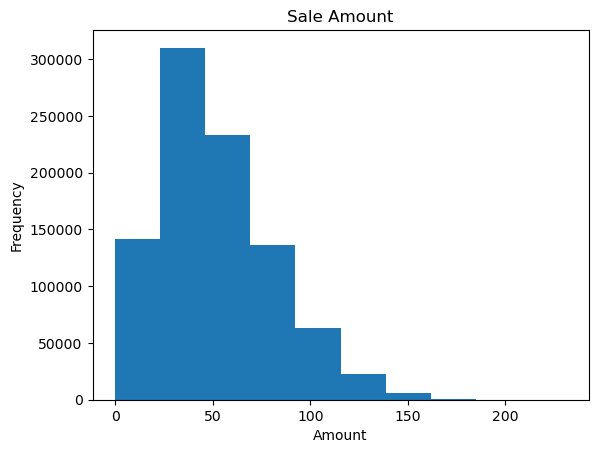

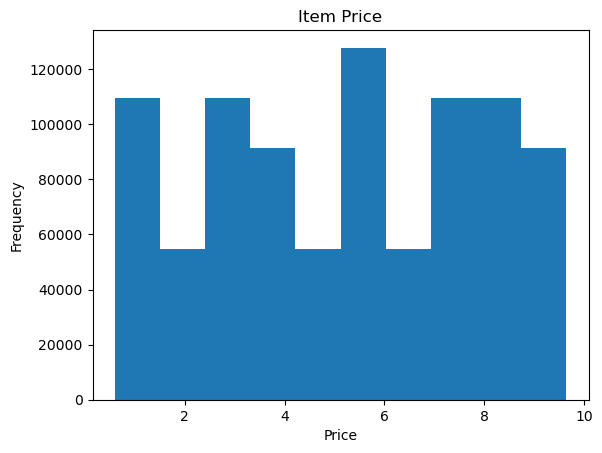

,dayofweek,month,sale_amount,item_price,sales_total,sale_id,item,item_id,item_name,item_brand,item_upc12,item_upc14,store_id,store,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,January,13.0,0.84,10.92,1,1,1,Riceland American Jazmine Rice,Riceland,35200264013,35200264013,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,1,January,26.0,1.16,30.16,295813,17,17,Ducal Refried Red Beans,Ducal,88313590791,88313590791,3,3,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,1,January,32.0,9.64,308.48,125995,7,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,Twinings Of London,70177154004,70177154004,10,10,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,1,January,45.0,4.39,197.55,314073,18,18,Scotch Removable Clear Mounting Squares - 35 Ct,Scotch,21200725340,21200725340,3,3,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,1,January,34.0,0.74,25.16,332333,19,19,Careone Family Comb Set - 8 Ct,Careone,41520035646,41520035646,3,3,2118 Fredericksburg Rdj,San Antonio,TX,78201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,6,December,31.0,9.02,279.62,706662,39,39,Munchies Sandwich Crackers Cheddar Cheese On G...,Munchies,28400029254,28400029254,7,7,12018 Perrin Beitel Rd,San Antonio,TX,78217
2017-12-31,6,December,22.0,0.60,13.20,724922,40,40,Amys Light & Lean Spaghetti Italiano,Amys,42272008063,42272008063,7,7,12018 Perrin Beitel Rd,San Antonio,TX,78217
2017-12-31,6,December,19.0,5.62,106.78,743182,41,41,P.f. Changs Home Menu Meal For Two Beef With B...,P.f. Changs,31000670016,31000670016,7,7,12018 Perrin Beitel Rd,San Antonio,TX,78217


In [58]:
prep_superstore_data(df)

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

    1. Convert date column to datetime format.

In [117]:
#load my csv
df = pd.read_csv('open_power_sys.csv', index_col=0)

In [118]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2+ KB


In [120]:
df = df.reset_index()

In [121]:
df.columns = df.columns.str.lower()

In [122]:
df.head()

,date,consumption,wind,solar,wind+solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [126]:
# change the date from object to datetime
df.date = df.date.astype('datetime64')

    2. Plot the distribution of each of your variables.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4383 non-null   datetime64[ns]
 1   consumption  4383 non-null   float64       
 2   wind         2920 non-null   float64       
 3   solar        2188 non-null   float64       
 4   wind+solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


date


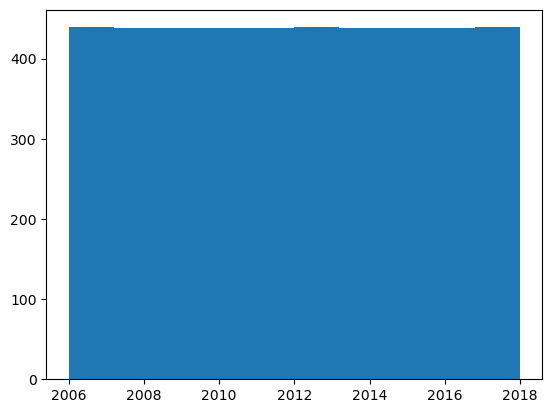

consumption


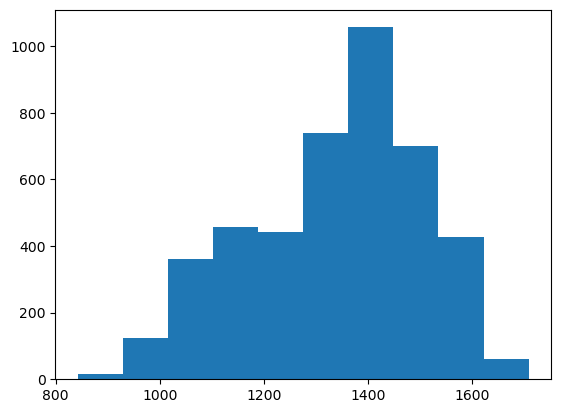

wind


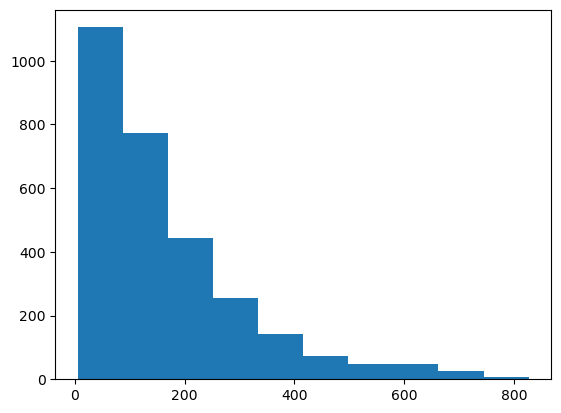

solar


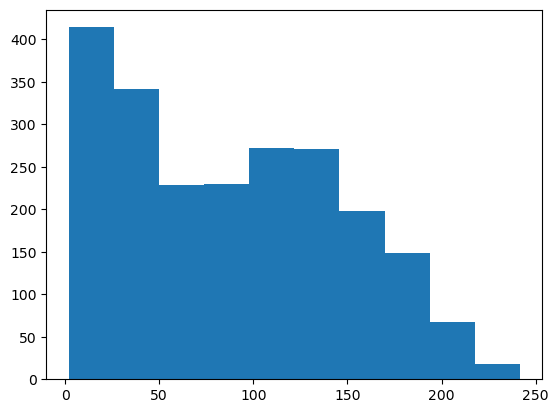

wind+solar


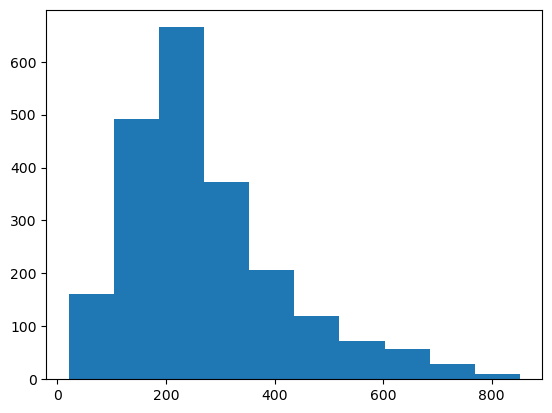

In [128]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

    3. Set the index to be the datetime variable.

In [129]:
# set sale_date as the index
df = df.set_index('date')

# sort the index (sale_date)
df = df.sort_index()

In [130]:
df

,consumption,wind,solar,wind+solar
date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


    4. Add a month and a year column to your dataframe.

In [138]:
# pull out monthly name & save
df['month'] = df.index.month_name()

# use year attribute and save
df['year'] = df.index.year

In [139]:
df

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


    5. Fill any missing values.

In [140]:
df.isnull().sum()

consumption       0
wind           1463
solar          2195
wind+solar     2196
month             0
year              0
dtype: int64

In [143]:
df = df.replace(np.nan,0)

In [144]:
df

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


    6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [145]:
#load my csv
df = pd.read_csv('open_power_sys.csv', index_col=0)

In [149]:
def prep_ops_data(df):
    '''
    This function will clean and prep the open power system database.
    It first reset the index so that the date is back to a column.
    In the process all the names of the columns were set to lowercase,
    the date columns was converted from an object to datetime64. The date 
    column was then reset back to the index and sorted. Also, two new columns
    were added to the dataframe. Finally, all missing values were set to zero. 
    '''
    
    # reset the index
    df = df.reset_index()
    
    # convert all the column names to lowercase
    df.columns = df.columns.str.lower()
    
    # change the date from object to datetime and save it back to the date column
    df.date = df.date.astype('datetime64')
    
    # set sale_date as the index
    df = df.set_index('date')

    # sort the index (sale_date)
    df = df.sort_index()
    
    # pull out monthly name & save
    df['month'] = df.index.month_name()

    # use year attribute and save
    df['year'] = df.index.year
    
    # replace all the nulls with a zero
    df = df.replace(np.nan,0)
    
    # perform a plot distribution of all the features
    for col in df.columns:
        print(col)
        plt.hist(df[col])
        plt.show()
    return df

consumption


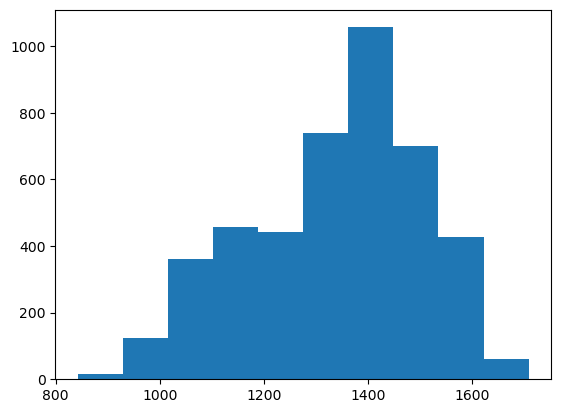

wind


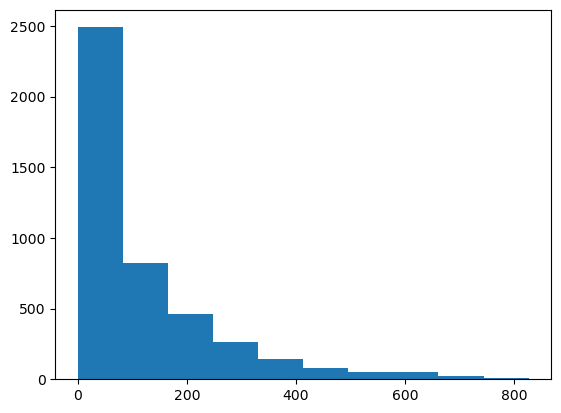

solar


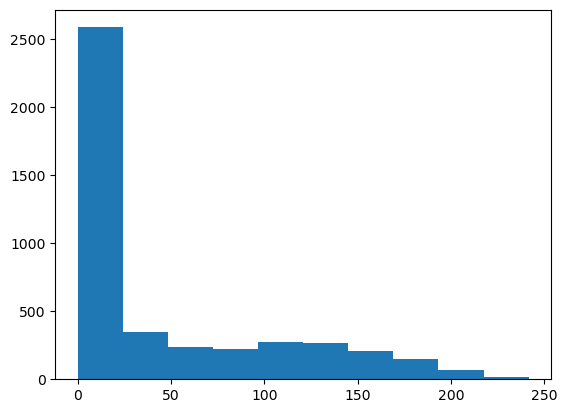

wind+solar


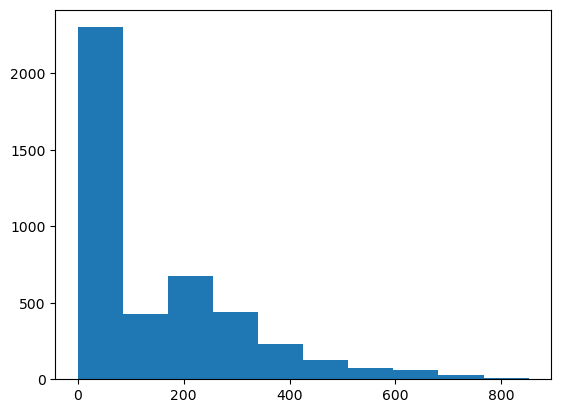

month


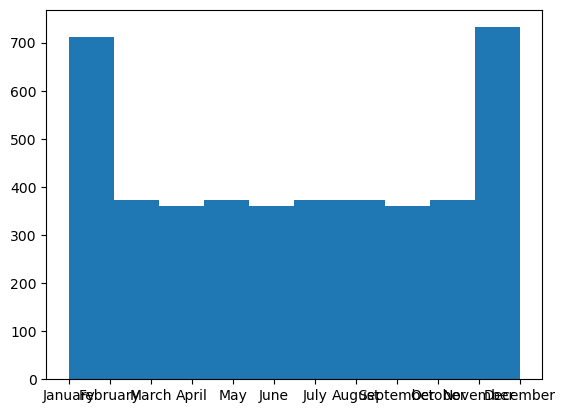

year


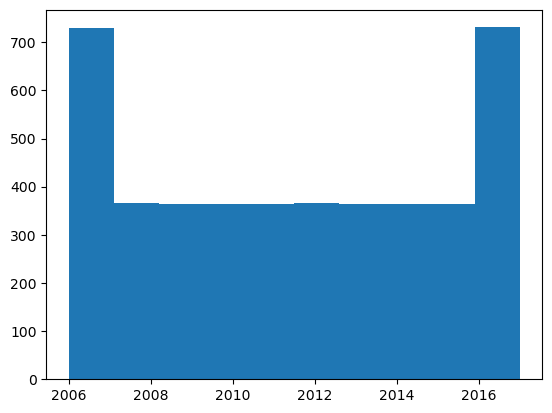

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [150]:
prep_ops_data(df)